In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
import subprocess
import os
import shlex
from sys import exit

In [4]:
os.chdir(r'C:\Users\as2023\bwSyncShare\01_Analysis\02_Europe_Flood')
area=2915100.00; # square metres
t_step=36000;      # seconds
start_time = dt.datetime(2016,1,1,0,0,0)
fak = 0.1; # To convert seconds to hours (3600/time step)
Location = r'C:\Users\as2023\bwSyncShare\01_Analysis\02_Europe_Flood\03_CATFLOW\out\bilanz.csv'

In [5]:
# Reading once to find number of rows
input_bal = pd.read_csv(Location,skiprows=2,
                      header=None,delimiter=';',engine='c')
bdata=np.array(input_bal)

# Function to skip footer rows
indx = []
for i in range(len(bdata)-1):
    if bdata[i,0] == 'Abschlusstabelle mit Bilanzgroessen der  Kontrollvolumina':
        exit
        indx.append(i)        

x=len(bdata)-int(indx[0])

# Dropping last n rows using drop
balance = input_bal.drop(input_bal.tail(x).index)

# Drop Last column
balance=balance.drop([18],axis=1) 

# Adding Column Names (English) All units in Cumecs unless specified otherwise
balance.columns = ['Hillslope Number','Time Step','Time',
                   'Cumulated Mass Balance Error','Soil Moisture','Cumulated Sinks',
                   'Cumulated Bounday Fluxes','Top Bounday Fluxes','Right Bounday Fluxes',
                   'Lower Bounday Fluxes','Left Bounday Fluxes',' Surface Runoff',
                   'Runoff Coefficient','Precipitation (cumecs)','Precipitation (mm)',
                   'Interception','Soil Evaporation','Transpiration']

# Export as Excel (if necessary)
#balance.to_excel(r'R:\impexp\Ashish\Krebsbach_best_setup\out\BalanceExcel.xlsx', index=False)

# Convert to Float Datatype (Not necessary in all cases)
balance = balance.astype('float')
# Convert to numpy array
bdata=np.array(balance)

time_series = balance.loc[:,'Time'].astype('timedelta64[s]') + start_time	

In [6]:
balance

,Hillslope Number,Time Step,Time,Cumulated Mass Balance Error,Soil Moisture,Cumulated Sinks,Cumulated Bounday Fluxes,Top Bounday Fluxes,Right Bounday Fluxes,Lower Bounday Fluxes,Left Bounday Fluxes,Surface Runoff,Runoff Coefficient,Precipitation (cumecs),Precipitation (mm),Interception,Soil Evaporation,Transpiration
0,1.0,24.0,36000.0,587.108,-11564.7,-197.964,-11953.9,-287.452,0.0,-11666.4,0.0,0.0,0.000000,139.787,0.024936,0.0,427.239,183.102
1,1.0,34.0,72000.0,1368.700,-22935.6,-403.330,-23901.0,-590.878,0.0,-23310.1,0.0,0.0,0.000000,279.574,0.049871,0.0,870.453,373.051
2,1.0,44.0,108000.0,1667.510,-23594.3,-613.919,-24647.9,10235.500,0.0,-34883.3,0.0,0.0,0.000000,11560.400,2.062190,0.0,1324.940,567.831
3,1.0,54.0,144000.0,1641.930,-17018.5,-822.358,-17838.1,28493.800,0.0,-46331.9,0.0,0.0,0.000000,30268.600,5.399420,0.0,1774.780,760.622
4,1.0,64.0,180000.0,1588.350,-13143.3,-1028.040,-13703.7,43920.400,0.0,-57624.1,0.0,0.0,0.000000,46139.100,8.230450,0.0,2218.670,950.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1.0,22466.0,31392000.0,148770.000,-1374130.0,-1219300.000,-303599.0,2717810.000,0.0,-3021410.0,0.0,29408.0,0.006011,4892570.000,872.754000,0.0,2631460.000,1127770.000
872,1.0,22476.0,31428000.0,148836.000,-1375070.0,-1219480.000,-304426.0,2717460.000,0.0,-3021880.0,0.0,29408.0,0.006011,4892600.000,872.758000,0.0,2631840.000,1127930.000
873,1.0,22486.0,31464000.0,148905.000,-1376020.0,-1219660.000,-305265.0,2717090.000,0.0,-3022350.0,0.0,29408.0,0.006011,4892610.000,872.761000,0.0,2632220.000,1128090.000
874,1.0,22496.0,31500000.0,148982.000,-1376980.0,-1219840.000,-306127.0,2716700.000,0.0,-3022830.0,0.0,29408.0,0.006011,4892610.000,872.761000,0.0,2632610.000,1128260.000


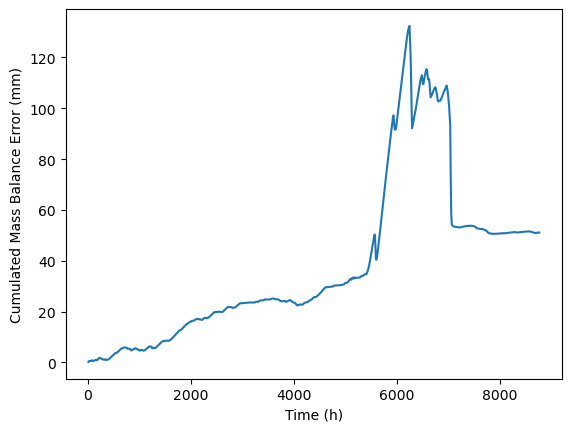

In [7]:
# Cumulated Mass Balance Error
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Cumulated Mass Balance Error']*1000/area)
plt.xlabel("Time (h)")
plt.ylabel("Cumulated Mass Balance Error (mm)")
plt.show()

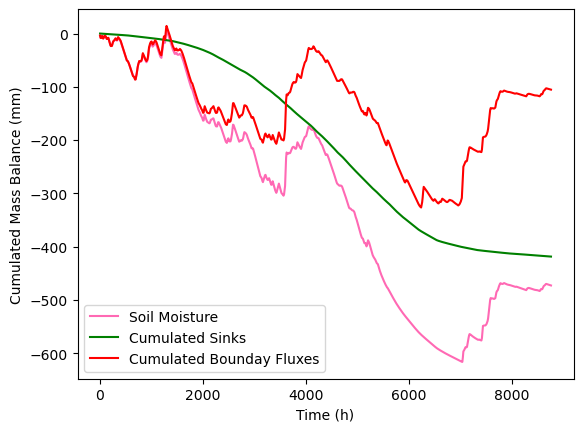

In [8]:
# Cumulated Mass Balance - Wetting, Sinks, Balance of Boundary Fluxes
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Soil Moisture']*1000/area,c='hotpink')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Cumulated Sinks']*1000/area,c='green')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Cumulated Bounday Fluxes']*1000/area,c='red')
plt.xlabel("Time (h)")
plt.ylabel("Cumulated Mass Balance (mm)")
plt.legend(['Soil Moisture', 'Cumulated Sinks','Cumulated Bounday Fluxes'])
plt.show()

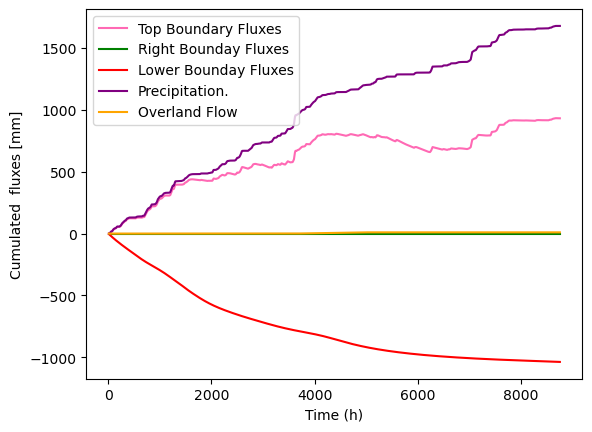

In [9]:
# Cumulated  fluxes [mm]
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Top Bounday Fluxes']*1000/area,c='hotpink')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Right Bounday Fluxes']*1000/area,c='green')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Lower Bounday Fluxes']*1000/area,c='red')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Precipitation (cumecs)']*1000/area,c='purple')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,' Surface Runoff']*1000/area,c='orange')
plt.xlabel("Time (h)")
plt.ylabel("Cumulated  fluxes [mm]")
plt.legend(['Top Boundary Fluxes', 'Right Bounday Fluxes','Lower Bounday Fluxes', 
            'Precipitation.', 'Overland Flow'])
plt.show()

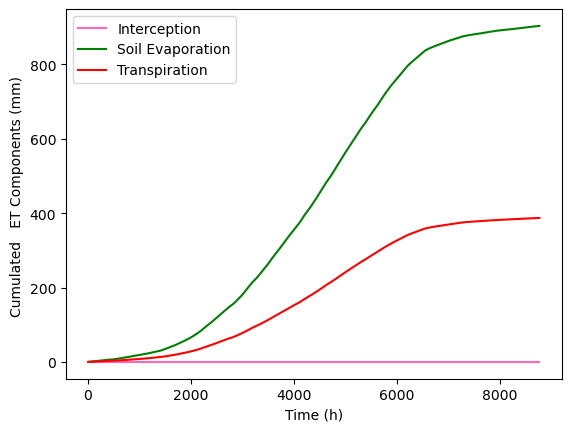

In [10]:
# Cumulated  ET Components (mm)
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Interception']*1000/area,c='hotpink')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Soil Evaporation']*1000/area,c='green')
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Transpiration']*1000/area,c='red')
plt.xlabel("Time (h)")
plt.ylabel("Cumulated   ET Components (mm) ")
plt.legend([ 'Interception','Soil Evaporation','Transpiration'])
plt.show()

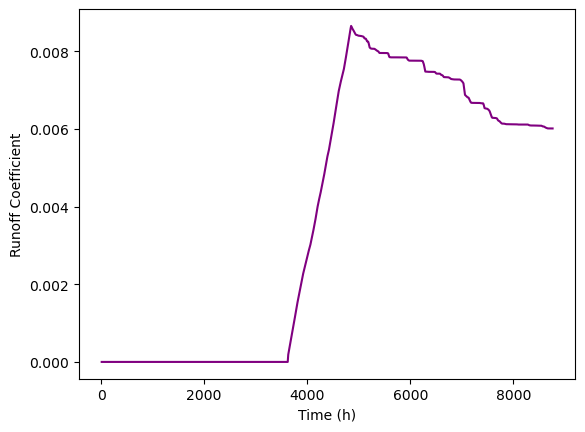

In [11]:
# Runoff Coefficient
plt.plot(balance.loc[:,'Time']/3600, balance.loc[:,'Runoff Coefficient'],c='purple')
plt.xlabel("Time (h)")
plt.ylabel("Runoff Coefficient")
plt.show()

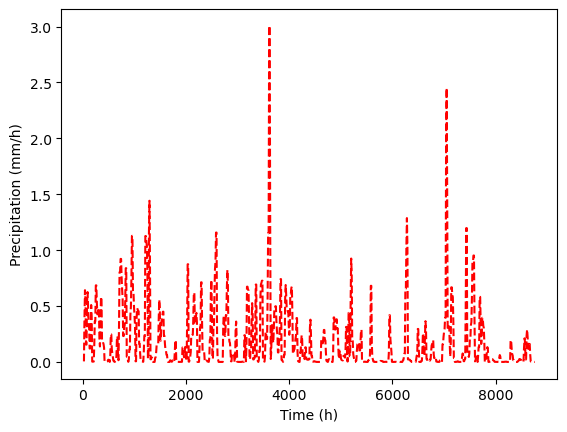

In [12]:
# Precipitation Intensity (mm/h) Hence fak is used
plt.plot(balance.loc[:,'Time']/3600,fak*balance.loc[:,'Precipitation (cumecs)'].diff()*1000/area,
         c='red',linestyle = 'dashed')
plt.xlabel("Time (h)")
plt.ylabel("Precipitation (mm/h)")
plt.show()


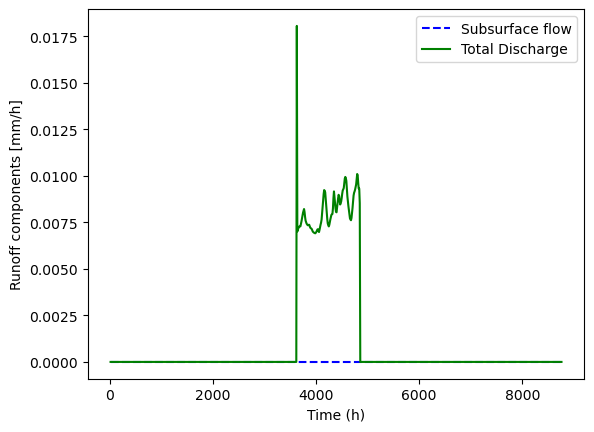

In [13]:
# Runoff components (mm/h) Hence fak (3600/tstep) is used
plt.plot(balance.loc[:,'Time']/3600,fak*balance.loc[:,'Right Bounday Fluxes'].diff()*1000/area,
         c='blue',linestyle = 'dashed')
plt.plot(balance.loc[:,'Time']/3600,(fak*balance.loc[:,' Surface Runoff'].diff()*1000/area-
                                     fak*balance.loc[:,'Right Bounday Fluxes'].diff()*1000/area),
         c='green')
plt.xlabel("Time (h)")
plt.ylabel("Runoff components [mm/h]")
plt.legend(['Subsurface flow','Total Discharge'])
plt.show()

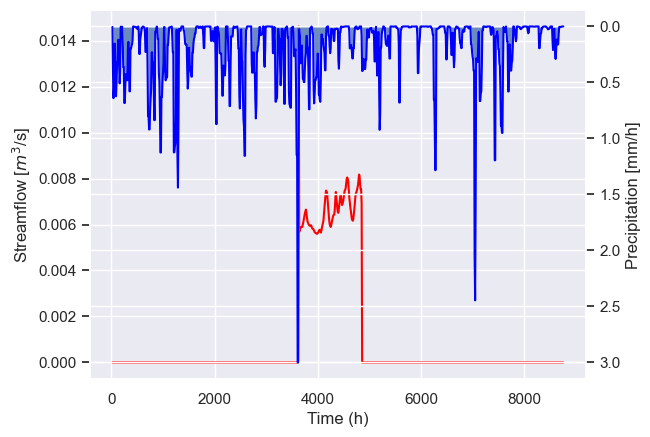

In [14]:
# Rainfall - Runoff Graph
sns.set_style("whitegrid")
sns.set_theme()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.lineplot(x = balance.loc[:,'Time']/3600, y= fak*balance.loc[:,'Precipitation (cumecs)'].diff()*1000/area, 
             data = balance, color="blue", ax=ax2)
ax2.fill_between(balance.loc[:,'Time']/3600, 0, fak*balance.loc[:,'Precipitation (cumecs)'].diff()*1000/area, alpha = 0.8)        
ax2.set_ylabel("Precipitation [mm/h]")
#ax2.set_ylim([0, 15])
ax2.invert_yaxis()

sns.lineplot(x = balance.loc[:,'Time']/3600, y=(balance.loc[:,' Surface Runoff'].diff()/t_step-
                                     balance.loc[:,'Right Bounday Fluxes'].diff()/t_step), 
             data = balance, color="red", ax=ax1)
ax1.set_ylabel("Streamflow [$m^3$/s]")
ax1.set_xlabel("Time (h)")
#ax1.set_ylim([0, 1.5])
plt.show()